## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ-1000 слов по частоте без учета стоп-слов.
2. Найдите топ-10 по частоте: имен, пар имя + фамилия, пар вида ''профессор'' + имя / фамилия. 

In [1]:
!pip install fasttext

In [2]:
import glob
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from tqdm.notebook import tqdm
import re
from nltk.corpus import names
from nltk import ngrams
import fasttext

nltk.download('names')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

[nltk_data] Downloading package names to /home/jovyan/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /home/jovyan/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
files = glob.glob('hpac_source/*')
len(files)

19225

In [4]:
# Английские стоп слова возьмем из nltk
stop_words = set(stopwords.words('english'))

In [5]:
# Загрузим все тексты для обработки
texts = []
for file in tqdm(files):
    with open(file) as f:
        texts.append(f.read())

  0%|          | 0/19225 [00:00<?, ?it/s]

In [6]:
%%time
# Преобразуем сырые тексты в токены, выкинем стоп слова и пунктуацию
fulll_text = ' '.join(texts)
fulll_text = [re.sub("[^a-zA-Z]","", word) for word in wordpunct_tokenize(fulll_text) 
              if (word not in stop_words) and (re.sub("[^a-zA-Z]","", word) != '')]

del texts

CPU times: user 5min 50s, sys: 8.22 s, total: 5min 58s
Wall time: 5min 58s


In [7]:
%%time
# Воспользуемся FreqDist для подсчёта частоты слов в текстах

fd = FreqDist(fulll_text)

CPU times: user 1min, sys: 3.99 ms, total: 1min
Wall time: 1min


In [8]:
a = fd.most_common(1000)
df = pd.DataFrame(a)
df.columns = ['word', 'freq']

df.to_csv('top-1000-words.csv', index=False)
df

,word,freq
0,n,2452749
1,harry,2154770
2,said,1236206
3,would,1039555
4,hermione,1021949
...,...,...
995,birthday,22844
996,sick,22751
997,caused,22748
998,floo,22732


#### Чтобы найти имена и фамилии героев в тексте, возьмём список имён и фамилий персонажей из интернета https://github.com/kreuzerk/HarryPotter-names/blob/develop/src/harryPotter.charcters.names.json

In [9]:
character_names = ['Hannah Abbott', 'Bathsheda Babbling', 'Ludo Bagman', 'Bathilda Bagshot', 'Marcus Belby', 'Katie Bell',
                   'Cuthbert Binns', 'Phineas Black', 'Regulus Black', 'Sirius Black', 'Broderick Bode', 'Bogrod',
                   'Amelia Bones', 'Susan Bones', 'Terry Boot', 'Borgin', 'Lavender Brown', 'Millicent Bulstrode',
                   'Charity Burbage', 'Frank Bryce', 'Alecto Carrow', 'Amycus Carrow', 'Reginald Cattermole', 
                   'Mary Cattermole', 'Cho Chang', 'Penelope Clearwater', 'Cole', 'Michael Corner', 'Vincent Crabbe', 
                   'Colin Creevey', 'Dennis Creevey', 'Dirk Cresswell', 'Bartemius Crouch', 'Roger Davies', 'John Dawlish',
                   'Fleur Delacour', 'Gabrielle Delacour', 'Dedalus Diggle', 'Amos Diggory', 'Cedric Diggory', 
                   'Armando Dippet', 'Elphias Doge', 'Antonin Dolohov', 'Aberforth Dumbledore', 'Albus Dumbledore',
                   'Ariana Dumbledore', 'Dudley Dursley', 'Marjorie Dursley', 'Petunia Dursley', 'Vernon Dursley', 
                   'Marietta Edgecombe', 'Everard', 'Arabella Figg', 'Argus Filch', 'Justin Finch-Fletchley',
                   'Seamus Finnigan', 'Marcus Flint', 'Nicolas Flamel', 'Mundungus Fletcher', 'Filius Flitwick', 
                   'Florean Fortescue', 'Cornelius Fudge', 'Marvolo Gaunt', 'Merope Gaunt', 'Morfin Gaunt', 
                   'Anthony Goldstein', 'Goyle Sr', 'Gregory Goyle', 'Hermione Granger', 'Gregorovitch', 
                   'Fenrir Greyback', 'Gellert Grindelwald', 'Wilhelmina Grubbly-Plank', 'Godric Gryffindor',
                   'Rubeus Hagrid', 'Rolanda Hooch', 'Mafalda Hopkirk', 'Helga Hufflepuff', 'Angelina Johnson', 
                   'Lee Jordan', 'Bertha Jorkins', 'Igor Karkaroff', 'Viktor Krum', 'Bellatrix Lestrange', 
                   'Rabastan Lestrange', 'Rodolphus Lestrange', 'Gilderoy Lockhart', 'Alice Longbottom',
                   'Augusta Longbottom', 'Frank Longbottom', 'Neville Longbottom', 'Luna Lovegood', 'Xenophilius Lovegood',
                   'Remus Lupin', 'Walden Macnair', 'Draco Malfoy', 'Lucius Malfoy', 'Narcissa Malfoy', 'Madam Malkin',
                   'Griselda Marchbanks', 'Olympe Maxime', 'Ernie Macmillan', 'Minerva McGonagall', 'Cormac McLaggen',
                   'Graham Montague', 'Alastor Moody', 'Moran', 'Theodore Nott', 'Bob Ogden', 'Garrick Ollivander', 
                   'Pansy Parkinson', 'Padma Patil', 'Parvati Patil', 'Peter Pettigrew', 'Antioch Peverell', 
                   'Cadmus Peverell', 'Ignotus Peverell', 'Irma Pince', 'Sturgis Podmore', 'Poppy Pomfrey', 
                   'Harry Potter', 'James Potter', 'Lily Potter', 'Quirinus Quirrell', 'Helena Ravenclaw', 
                   'Rowena Ravenclaw', 'Tom Riddle', 'Roberts', 'Demelza Robins', 'Augustus Rookwood', 'Albert Runcorn',
                   'Scabior', 'Rufus Scrimgeour', 'Kingsley Shacklebolt', 'Stan Shunpike', 'Aurora Sinistra',
                   'Rita Skeeter', 'Horace Slughorn', 'Salazar Slytherin', 'Hepzibah Smith', 'Zacharias Smith',
                   'Severus Snape', 'Alicia Spinnet', 'Pomona Sprout', 'Pius Thicknesse', 'Dean Thomas', 
                   'Andromeda Tonks', 'Nymphadora Tonks', 'Ted Tonks', 'Travers', 'Sybill Trelawney', 'Dolores Umbridge', 
                   'Emmeline Vance', 'Romilda Vane', 'Septima Vector', 'Voldemort', 'Myrtle Warren', 'Cassius Warrington',
                   'Arthur Weasley', 'Bill Weasley', 'Charlie Weasley', 'Fred Weasley', 'George Weasley', 'Ginny Weasley',
                   'Molly Weasley', 'Percy Weasley', 'Ron Weasley', 'Oliver Wood', 'Kennilworthy Whisp', 'Yaxley',
                   'Blaise Zabini']



In [10]:
# Преобразуем к нижнему регистру
character_names = [i.lower() for i in character_names]

In [11]:
# Достанем из пар имя-фамиля отдельно имена и фамилии, это нужно для поиска со словом профессор
names = [i.split()[0] for i in character_names if len(i.split()) == 2]
surnames = [i.split()[1] for i in character_names if len(i.split()) == 2]

word_professor = 'professor'

names_professor = [word_professor + ' ' + name for name in names]
surnames_professor = [word_professor + ' ' + surname for surname in surnames]

In [12]:
# Ответ на пункт частотность имён 
names_counts = {name:fd[name] for name in names}

In [13]:
# Вспомогательная функция для красивого вывода
def print_result(res, k):
    res = dict(sorted(res.items(), key=lambda item: item[1], reverse=True))
    for idx, hero in enumerate(res.items()):
        print(hero[0], hero[1])
        if idx == k:
            break

In [14]:
print_result(names_counts, 10)

harry 2154770
hermione 1021949
draco 758718
ron 504330
severus 358228
ginny 356212
sirius 333550
james 258003
remus 222195
lily 213270
albus 127032


In [15]:
%%time
# Нарежем текст на биграмы
n = 2
bigrams = ngrams(fulll_text, n)

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 18.6 µs


In [16]:
%%time
# Осуществляем проход по этим парам, если находим совпадение с именем-фаамилией или профессор + имя/фаамилия,
# то инкрементируем значение в соотвествующем словаре
full_names = {name:0 for name in character_names}
professor_names = {name:0 for name in names_professor}
professor_surnames = {name:0 for name in surnames_professor}

for gram in tqdm(bigrams):
    text = gram[0] + ' ' + gram[1]
    if text in character_names:
        full_names[text] += 1
        
    if text in names_professor:
        # idx = names_professor.index(text)
        professor_names[text] += 1
    if text in surnames_professor:
        # idx = surnames_professor.index(text)
        professor_surnames[text] += 1

0it [00:00, ?it/s]

CPU times: user 11min 2s, sys: 1.13 s, total: 11min 4s
Wall time: 11min 2s


In [17]:
# Ответ на имя+фамилия
print_result(full_names, 10)

harry potter 72286
draco malfoy 27094
severus snape 17747
hermione granger 17689
james potter 15840
sirius black 15135
lucius malfoy 13594
albus dumbledore 11932
tom riddle 10664
remus lupin 7366
ginny weasley 6201


In [18]:
# Ответ на профессор + имя
print_result(professor_names, 10)

professor harry 2547
professor hermione 1189
professor severus 819
professor draco 318
professor minerva 275
professor remus 249
professor ginny 231
professor ron 210
professor albus 208
professor sirius 168
professor neville 162


In [19]:
# Ответ на профессор + фамилия
print_result(professor_surnames, 10)

professor snape 25176
professor mcgonagall 22952
professor dumbledore 13458
professor lupin 5648
professor flitwick 5040
professor slughorn 3186
professor sprout 3062
professor trelawney 1770
professor longbottom 1596
professor umbridge 1475
professor binns 1192


In [20]:
# Так же как вариант общий список со словом профессор, в задании не сказано какой именно должен быть итоговый список
print_result({**professor_names, **professor_surnames}, 10)

professor snape 25176
professor mcgonagall 22952
professor dumbledore 13458
professor lupin 5648
professor flitwick 5040
professor slughorn 3186
professor sprout 3062
professor harry 2547
professor trelawney 1770
professor longbottom 1596
professor umbridge 1475


## Часть 2. [2 балла] Модели представления слов 
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса HPAC.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели. 
2. Визуализируйте топ-1000 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

In [21]:
emb_model = fasttext.train_unsupervised('clean_hpac_text.txt', dim=300, minn=3, maxn=6, epoch=3, lr=0.05)

Read 279M words
Number of words:  111791
Number of labels: 0
Progress: 100.0% words/sec/thread:   20388 lr:  0.000000 avg.loss:  1.099172 ETA:   0h 0m 0s


In [22]:
emb_model.save_model("hpac_emb_model.bin")

#### Смотрим на синонимы, ассоциации и OOV:

In [23]:
emb_model =  fasttext.load_model("hpac_emb_model.bin")

##### Поиск синонимов:

In [24]:
emb_model.get_nearest_neighbors('potter')

[(0.6308136582374573, 'harry'),
 (0.6307636499404907, 'malfoy'),
 (0.6066147685050964, 'evans'),
 (0.5901106595993042, 'potterrr'),
 (0.5887869000434875, 'potterphan'),
 (0.5786023139953613, 'granger'),
 (0.5772463083267212, 'pottered'),
 (0.5725433826446533, 'potters'),
 (0.5521944761276245, 'pottey'),
 (0.5438971519470215, 'potterpal')]

In [25]:
emb_model.get_nearest_neighbors('harry')

[(0.7602174282073975, 'hermione'),
 (0.7439568638801575, 'draco'),
 (0.733916699886322, 'ron'),
 (0.7162286639213562, 'ginny'),
 (0.6757525205612183, '</s>'),
 (0.6413949728012085, 'neville'),
 (0.6326805353164673, 'severus'),
 (0.6308137774467468, 'potter'),
 (0.6294835805892944, 'hermoione'),
 (0.6211492419242859, 'hermioned')]

In [26]:
emb_model.get_nearest_neighbors('school')

[(0.8052400946617126, 'hogwarts'),
 (0.7484577298164368, 'schoolyear'),
 (0.7368559241294861, 'hogwarrts'),
 (0.7352192997932434, 'hogwar'),
 (0.7204070687294006, 'highschool'),
 (0.703701913356781, 'hogward'),
 (0.7033289670944214, 'hogwart'),
 (0.7003204822540283, 'schoolies'),
 (0.6990946531295776, 'hogwartss'),
 (0.695198118686676, 'schoolwide')]

In [27]:
emb_model.get_nearest_neighbors('magic')

[(0.7032192349433899, 'magics'),
 (0.6632398366928101, 'medimagic'),
 (0.653995931148529, 'mindmagic'),
 (0.6332969665527344, 'antimagic'),
 (0.6270113587379456, 'nonmagic'),
 (0.6239686608314514, 'magictec'),
 (0.6146223545074463, 'magical'),
 (0.6104609966278076, 'magicfolk'),
 (0.5995575785636902, 'magicks'),
 (0.5992085933685303, 'metalmagic')]

In [28]:
emb_model.get_nearest_neighbors('security')

[(0.671028733253479, 'securities'),
 (0.5842717885971069, 'safety'),
 (0.5535528659820557, 'clearance'),
 (0.5486371517181396, 'measures'),
 (0.5468735098838806, 'clearances'),
 (0.5439064502716064, 'warders'),
 (0.5383652448654175, 'lockdown'),
 (0.5375968813896179, 'guards'),
 (0.5365303754806519, 'protections'),
 (0.5313632488250732, 'personnel')]

In [29]:
emb_model.get_nearest_neighbors('chemistry')

[(0.8780654072761536, 'biochemistry'),
 (0.8036171197891235, 'chemistries'),
 (0.7329322099685669, 'chemists'),
 (0.7083354592323303, 'science'),
 (0.6782124638557434, 'sciences'),
 (0.6722354292869568, 'chemist'),
 (0.6636228561401367, 'mistry'),
 (0.647377610206604, 'sociology'),
 (0.6330186128616333, 'biology'),
 (0.6312244534492493, 'ology')]

##### Поиск ассоциаций:

In [30]:
emb_model.get_analogies("ron", "harry", "granger")

[(0.6777949929237366, 'ronald'),
 (0.6314571499824524, 'weasley'),
 (0.5815407037734985, 'weaslette'),
 (0.57679283618927, 'weaselly'),
 (0.5741403698921204, 'weaslett'),
 (0.570025622844696, 'weasel'),
 (0.5699644684791565, 'weasle'),
 (0.5697203874588013, 'weasely'),
 (0.5674579739570618, 'weasellette'),
 (0.5670307874679565, 'weaselbe')]

In [31]:
emb_model.get_analogies("potter", "man", "woman")

[(0.5922580361366272, 'granger'),
 (0.5560363531112671, 'evans'),
 (0.5483051538467407, 'ginevra'),
 (0.5450285077095032, 'potterette'),
 (0.5220267176628113, 'ginerva'),
 (0.5162665843963623, 'daphneandbellatrixpotter'),
 (0.5108133554458618, 'malfoy'),
 (0.503569483757019, 'weasley'),
 (0.49800819158554077, 'potterrr'),
 (0.49397751688957214, 'parkinson')]

In [32]:
emb_model.get_analogies("school", "hogwatrs", "science")

[(0.6195686459541321, 'sciences'),
 (0.5618870854377747, 'neuroscience'),
 (0.5610359311103821, 'chemistry'),
 (0.5341458916664124, 'physics'),
 (0.5323947072029114, 'biology'),
 (0.5284082293510437, 'sociology'),
 (0.5223705172538757, 'prescience'),
 (0.5083782076835632, 'ology'),
 (0.5035045742988586, 'biochemistry'),
 (0.5005998611450195, 'herbiology')]

##### Oot-of-vocabluary:

In [33]:
'kemistry' in emb_model 

False

In [34]:
emb_model.get_nearest_neighbors('kemistry')

[(0.8041048645973206, 'biochemistry'),
 (0.7978596091270447, 'mistry'),
 (0.7815597057342529, 'chemistry'),
 (0.6823858022689819, 'palmistry'),
 (0.6685852408409119, 'mnistry'),
 (0.6576969027519226, 'casuistry'),
 (0.6534046530723572, 'sociology'),
 (0.6528345942497253, 'sciences'),
 (0.6386447548866272, 'ontology'),
 (0.6374240517616272, 'science')]

In [35]:
'scooul' in emb_model 

False

In [36]:
emb_model.get_nearest_neighbors('schooul')

[(0.768642783164978, 'scho'),
 (0.7458047270774841, 'schoolkid'),
 (0.7447836399078369, 'schoonmaker'),
 (0.7405828237533569, 'schoolies'),
 (0.7303865551948547, 'schooner'),
 (0.7187692523002625, 'schoolfellows'),
 (0.7158814668655396, 'schon'),
 (0.7013328075408936, 'schoolkeeper'),
 (0.6961395144462585, 'schoolfriend'),
 (0.6786463260650635, 'schoolyear')]

In [37]:
'ogwart' in emb_model

False

In [38]:
emb_model.get_nearest_neighbors('ogwart')

[(0.9381527900695801, 'ogwarts'),
 (0.712559163570404, 'hoooogwarts'),
 (0.6657937169075012, 'ermione'),
 (0.6420880556106567, 'arry'),
 (0.6389479041099548, 'howgwarts'),
 (0.6375869512557983, 'zou'),
 (0.6372662782669067, 'zough'),
 (0.6366258263587952, 'weell'),
 (0.6331831216812134, 'ave'),
 (0.6298683285713196, 'ermionee')]

#### Визуализация самых популярных слов с помощью TSNE:  
Популярные слова взяли из пункта 1.1

In [39]:
from sklearn.manifold import TSNE
import numpy as np
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from sklearn.decomposition import TruncatedSVD
from IPython.display import Image

In [40]:
top_words = pd.read_csv('top-1000-words.csv')

In [41]:
top_words_vec = np.array([emb_model[word] for word in top_words['word'].tolist()])

In [42]:
%%time
tsne = TSNE(n_components=2, random_state=19)
top_words_tsne = tsne.fit_transform(top_words_vec)

/home/user/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/user/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 23.8 s, sys: 1.01 s, total: 24.8 s
Wall time: 2.25 s


In [43]:
top_words['alpha'] = (top_words['freq'] - top_words['freq'].min()) / (top_words['freq'].max() - top_words['freq'].min())

In [44]:
output_notebook()

p = figure(
    tools="pan,wheel_zoom,reset,save", 
    toolbar_location="above",
    title="FastText T-SNE (HPAC, top-1000 words)"
)

source = ColumnDataSource(
    data=dict(x1=top_words_tsne[:,0], x2=top_words_tsne[:,1], names=top_words['word'], alpha=top_words['alpha'])
)

p.scatter(x="x1", y="x2", size=10, alpha="alpha", color="navy", source=source)

labels = LabelSet(
    x="x1", y="x2", text="names", y_offset=6,
    text_font_size="8pt", text_color="#555555",
    source=source, text_align='center'
)
p.add_layout(labels)

show(p)

Loading BokehJS ...

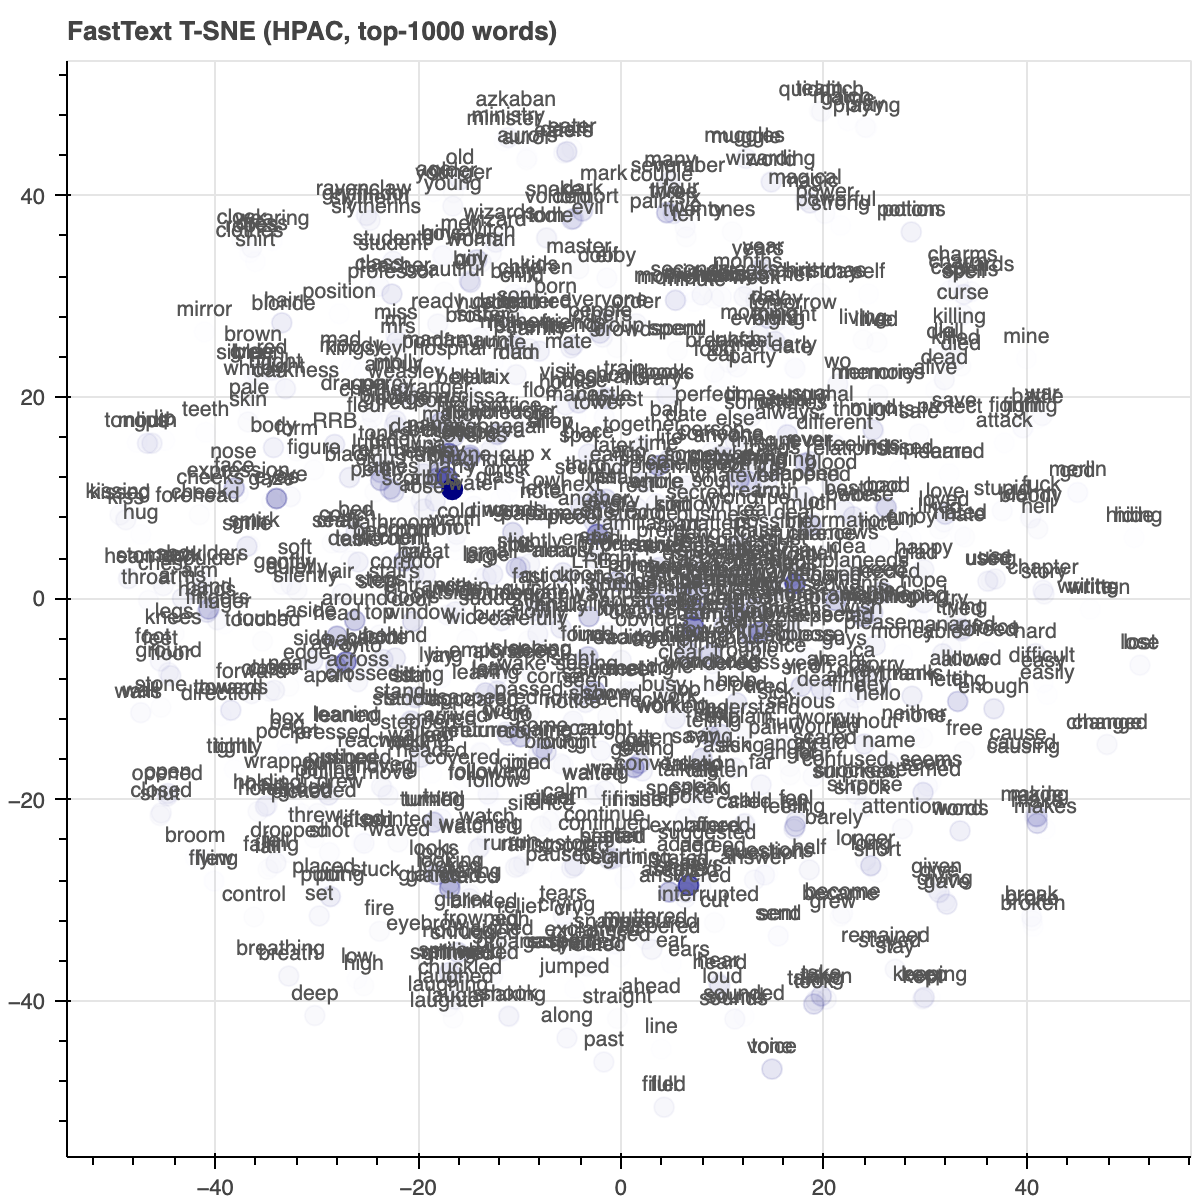

In [45]:
Image('bokeh_plot.png')

In [46]:
svd_50 = TruncatedSVD(n_components=50)
top_words_vec_50 = svd_50.fit_transform(top_words_vec)
top_words_tsne2 = TSNE(n_components=2, random_state=0).fit_transform(top_words_vec_50)
output_notebook()

p = figure(
    tools="pan,wheel_zoom,reset,save",
    toolbar_location="above",
    title="FastText T-SNE (HPAC, top-1000 words, +SVD)"
)

source = ColumnDataSource(
    data=dict(x1=top_words_tsne2[:,0], x2=top_words_tsne2[:,1], names=top_words['word'], alpha=top_words['alpha'])
)

p.scatter(x="x1", y="x2", size=10, alpha="alpha", color="navy", source=source)

labels = LabelSet(
    x="x1", y="x2", text="names", y_offset=6,
    text_font_size="8pt", text_color="#555555",
    source=source, text_align='center'
)
p.add_layout(labels)

show(p)

/home/user/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/user/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Loading BokehJS ...

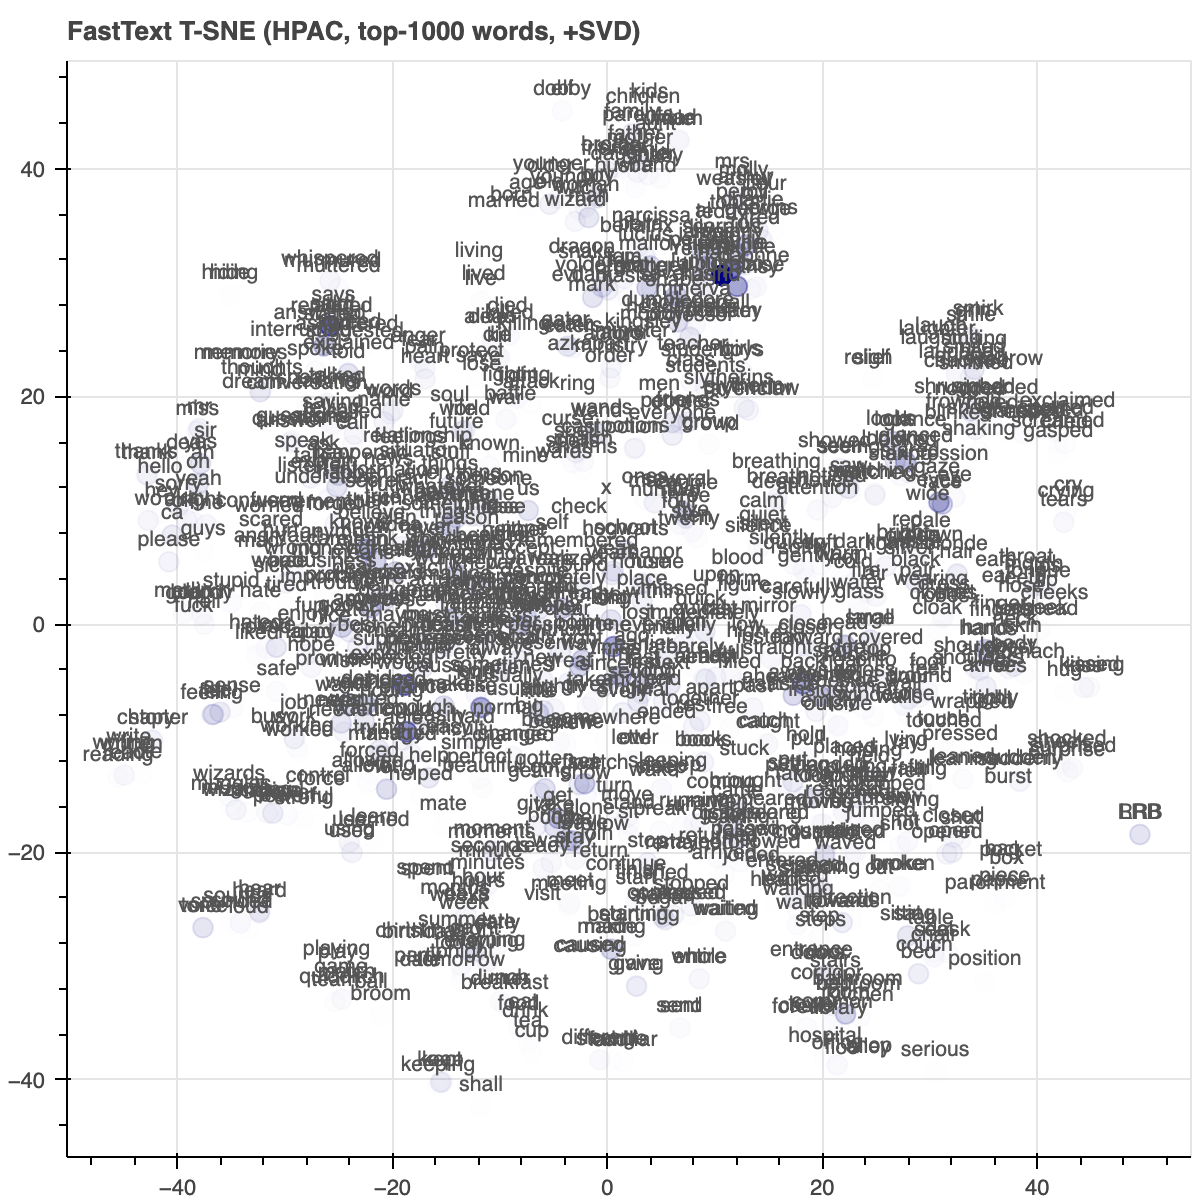

In [47]:
Image('bokeh_plot (1).png')

На графиках видно:
1. Нет коррелляции по частоте слов (частые или редкие слова не кучкуются рядом, а размазаны по поверхности)
2. Видно, что кучкуются близкие слова: имена, фамилии, синонимы/антонимы или просто похожие по буквам слова (ever/never)

## Часть 3. [5 баллов] Классификация текстов

Находится в следующем ноутбуке hw1_part2